<a href="https://colab.research.google.com/github/esheffi3/ML4105/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eric Sheffield
# 4105 Homework 2
# Student ID: 801205219

In [26]:
!git clone https://github.com/esheffi3/ML4105

fatal: destination path 'ML4105' already exists and is not an empty directory.


Values used:
*   Iterations: 1000
*   Alpha: 0.01
*   Lambda: 0.1




# Question 1 Part A

<IPython.core.display.Javascript object>

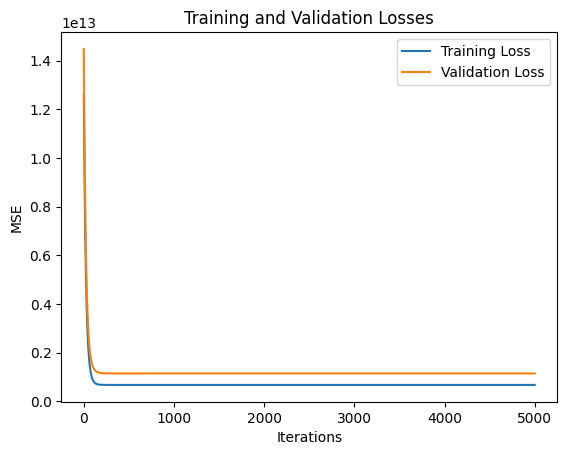

Final Training Loss: 6.75e+11
Final Validation Loss: 1.15e+12
Theta Parameters: [4706527.38532108  680058.42414123  112973.18562909  565408.61793601
  424354.81176353  288348.7726677 ]


In [25]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import decimal

df = pd.read_csv('ML4105/Assignments/Assignment 2/Housing.csv')

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def gradient_descent_with_validation(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000):
    m = len(y_train)
    X_train = np.hstack((np.ones((m, 1)), X_train))
    theta = np.zeros(X_train.shape[1])
    cost_history_train = []
    cost_history_val = []

    for _ in range(iterations):
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradients = 2/m * X_train.T.dot(errors_train)
        theta -= learning_rate * gradients

        cost_train = np.sum(errors_train ** 2) / (2 * m)
        cost_history_train.append(cost_train)

        predictions_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val)).dot(theta)
        errors_val = predictions_val - y_val
        cost_val = np.sum(errors_val ** 2) / (2 * len(y_val))
        cost_history_val.append(cost_val)

    return theta, cost_history_train, cost_history_val

X_train_np = np.array(X_train_scaled)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

theta, cost_history_train, cost_history_val = gradient_descent_with_validation(X_train_np, y_train_np, X_test_scaled, y_test_np, learning_rate=0.01, iterations=5000)

plt.plot(cost_history_train, label='Training Loss')
plt.plot(cost_history_val, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

print(f"Final Training Loss: {cost_history_train[-1]:.2e}")
print(f"Final Validation Loss: {cost_history_val[-1]:.2e}")


print(f"Theta Parameters: {theta}")

**The best theta values for parameters were found above.**

# Question 1 Part B

<IPython.core.display.Javascript object>

<ipython-input-24-9c7be5584c1a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_vars] = X[categorical_vars].applymap(lambda x: 1 if x == 'yes' else 0)


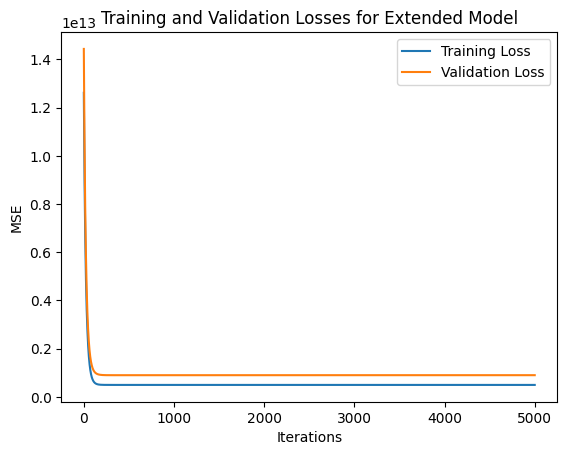

Final Training Loss: 4.96e+11
Final Validation Loss: 9.00e+11
Theta Parameters: [4706527.38532108  523387.27560797   58623.06229325  528975.10754913
  365907.58070422  144130.6077236    93366.50467181  208520.89054768
  155907.28686967  372995.82840639  211306.48841805  269576.1656238 ]


In [24]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import decimal

df = pd.read_csv('ML4105/Assignments/Assignment 2/Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = df[features]
y = df['price']

categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[categorical_vars] = X[categorical_vars].applymap(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def gradient_descent_with_validation(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000):
    m = len(y_train)
    X_train = np.hstack((np.ones((m, 1)), X_train))
    theta = np.zeros(X_train.shape[1])
    cost_history_train = []
    cost_history_val = []

    for _ in range(iterations):
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradients = 2/m * X_train.T.dot(errors_train)
        theta -= learning_rate * gradients

        cost_train = np.sum(errors_train ** 2) / (2 * m)
        cost_history_train.append(cost_train)

        predictions_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val)).dot(theta)
        errors_val = predictions_val - y_val
        cost_val = np.sum(errors_val ** 2) / (2 * len(y_val))
        cost_history_val.append(cost_val)

    return theta, cost_history_train, cost_history_val

X_train_np = np.array(X_train_scaled)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

theta, cost_history_train, cost_history_val = gradient_descent_with_validation(X_train_np, y_train_np, X_test_scaled, y_test_np, learning_rate=0.01, iterations=5000)

plt.plot(cost_history_train, label='Training Loss')
plt.plot(cost_history_val, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Training and Validation Losses for Extended Model')
plt.legend()
plt.show()

print(f"Final Training Loss: {cost_history_train[-1]:.2e}")
print(f"Final Validation Loss: {cost_history_val[-1]:.2e}")

print(f"Theta Parameters: {theta}")

**The best theta values for parameters were found above.**

**Moving from 1A to 1B shows a clear benefit from including more training variables. Both the training and validation losses decrease, which signifies an overall improvement in model performance.**

# Question 2 Part A

<IPython.core.display.Javascript object>

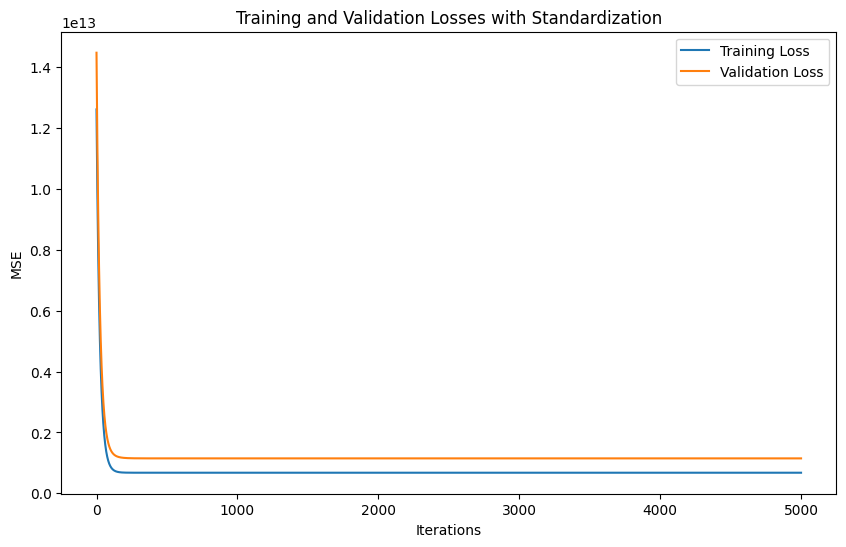

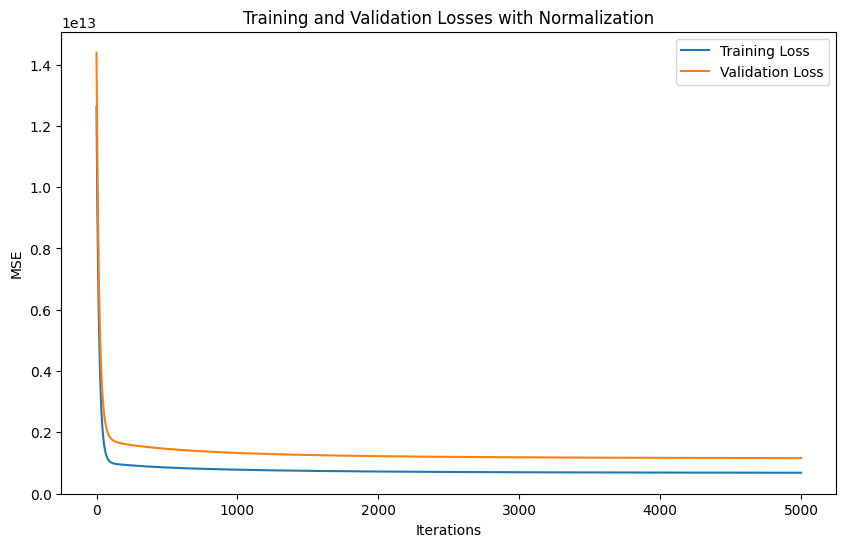

Final Training Loss with Standardization: 6.75e+11, Validation Loss: 1.15e+12
Final Training Loss with Normalization: 6.79e+11, Validation Loss: 1.16e+12
Theta Parameters: [4706527.38532108  625401.69771766  137049.27662666  525298.48219192
  392110.8562572   284363.0540677 ]


In [23]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import decimal

df = pd.read_csv('ML4105/Assignments/Assignment 2/Housing.csv')


X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def preprocess_data(X_train, X_test, method='standardization'):
    if method == 'normalization':
        scaler = MinMaxScaler()
    elif method == 'standardization':
        scaler = StandardScaler()
    else:
        raise ValueError("Method must be 'normalization' or 'standardization'")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled


def train_and_plot(X_train, y_train, X_test, y_test, method, learning_rate=0.01, iterations=5000):
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test, method=method)

    X_train_np = np.array(X_train_scaled)
    y_train_np = np.array(y_train)
    y_test_np = np.array(y_test)

    theta, cost_history_train, cost_history_val = gradient_descent_with_validation(
        X_train_np, y_train_np, X_test_scaled, y_test_np, learning_rate, iterations
    )

    plt.figure(figsize=(10, 6))
    plt.plot(cost_history_train, label='Training Loss')
    plt.plot(cost_history_val, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title(f'Training and Validation Losses with {method.capitalize()}')
    plt.legend()
    plt.show()

    return cost_history_train[-1], cost_history_val[-1]

train_loss_std, val_loss_std = train_and_plot(X_train, y_train, X_test, y_test, method='standardization')

train_loss_norm, val_loss_norm = train_and_plot(X_train, y_train, X_test, y_test, method='normalization')

print(f"Final Training Loss with Standardization: {train_loss_std:.2e}, Validation Loss: {val_loss_std:.2e}")
print(f"Final Training Loss with Normalization: {train_loss_norm:.2e}, Validation Loss: {val_loss_norm:.2e}")

print(f"Theta Parameters: {theta}")

The best theta values for parameters were found above.

The order of from best training to worst training from final loss is as follows:

1.   Standardization - 6.75e+11
2.   Baseline - 6.75e+11
3.   Normalization - 6.79e+11


The order of from best training to worst training from final validation loss is as follows:

1.   Standardization - 1.15e+12
2.   Baseline - 1.15e+12
3.   Normalization - 1.16e+12

**The results from 2A suggest that neither standardization nor normalization provides a clear advantage for this particular model and dataset over the unprocessed baseline (1A). This could be due to various factors, including the nature of the data, the model's resilience to feature scale, or the possibility that the original features were already in a relatively suitable scale or range for the model.**

# Question 2 Part B

<IPython.core.display.Javascript object>

<ipython-input-22-080c8548944a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_vars] = X[categorical_vars].applymap(lambda x: 1 if x == 'yes' else 0)


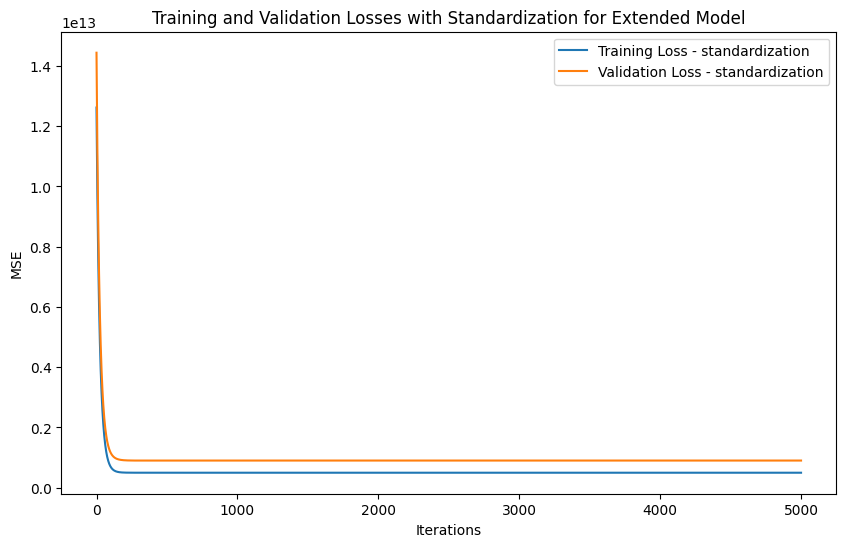

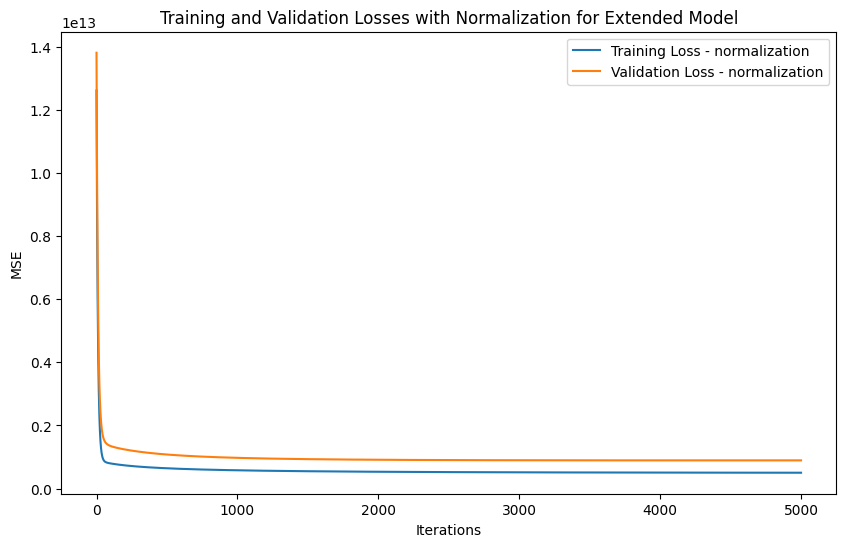

Final Training Loss with Standardization: 4.96e+11, Validation Loss: 9.00e+11
Final Training Loss with Normalization: 5.00e+11, Validation Loss: 8.92e+11
Theta Parameters: [4706527.38532108  625401.69771766  137049.27662666  525298.48219192
  392110.8562572   284363.0540677 ]


In [22]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import decimal

df = pd.read_csv('ML4105/Assignments/Assignment 2/Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = df[features]
y = df['price']

categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[categorical_vars] = X[categorical_vars].applymap(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def preprocess_data(X_train, X_test, method='standardization'):
    if method == 'normalization':
        scaler = MinMaxScaler()
    elif method == 'standardization':
        scaler = StandardScaler()
    else:
        raise ValueError("Method must be 'normalization' or 'standardization'")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

def train_and_plot(X_train, y_train, X_test, y_test, method, learning_rate=0.01, iterations=5000):
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test, method=method)

    X_train_np = np.array(X_train_scaled)
    y_train_np = np.array(y_train)
    y_test_np = np.array(y_test)

    theta, cost_history_train, cost_history_val = gradient_descent_with_validation(
        X_train_np, y_train_np, X_test_scaled, y_test_np, learning_rate, iterations
    )

    plt.figure(figsize=(10, 6))
    plt.plot(cost_history_train, label='Training Loss - ' + method)
    plt.plot(cost_history_val, label='Validation Loss - ' + method)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title(f'Training and Validation Losses with {method.capitalize()} for Extended Model')
    plt.legend()
    plt.show()

    return cost_history_train[-1], cost_history_val[-1]

train_loss_std, val_loss_std = train_and_plot(X_train, y_train, X_test, y_test, method='standardization')

train_loss_norm, val_loss_norm = train_and_plot(X_train, y_train, X_test, y_test, method='normalization')

print(f"Final Training Loss with Standardization: {train_loss_std:.2e}, Validation Loss: {val_loss_std:.2e}")
print(f"Final Training Loss with Normalization: {train_loss_norm:.2e}, Validation Loss: {val_loss_norm:.2e}")

print(f"Theta Parameters: {theta}")

The best theta values for parameters were found above.

The order of from best training to worst training from final loss is as follows:

1.   Baseline - 4.96e+11
2.   Standardization - 4.96e+11
3.   Normalization - 5.00e+11

The order of from best training to worst training from final validation loss is as follows:

1.   Normalization - 8.92e+11
2.   Baseline - 9.00e+11
3.   Standardization - 9.00e+11

**While standardization doesn't seem to affect the model with additional training variables, normalization slightly worsens training performance but improves validation performance, hinting at better generalization.**


# Question 3 Part A

<IPython.core.display.Javascript object>

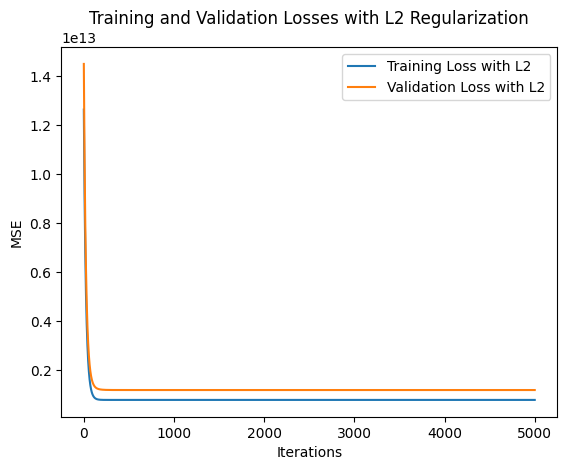

Final Training Loss: 7.70e+11
Final Validation Loss: 1.17e+12
Theta Parameters: [4706527.38532108  625401.69771766  137049.27662666  525298.48219192
  392110.8562572   284363.0540677 ]


In [21]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import decimal

df = pd.read_csv('ML4105/Assignments/Assignment 2/Housing.csv')

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  # or MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def gradient_descent_l2(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000, lambda_reg=0.1):
    m = len(y_train)
    X_train = np.hstack((np.ones((m, 1)), X_train))
    theta = np.zeros(X_train.shape[1])
    cost_history_train = []
    cost_history_val = []

    for _ in range(iterations):
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradients = 2/m * X_train.T.dot(errors_train) + (2 * lambda_reg * theta)

        theta[0] -= learning_rate * 2/m * X_train[:,0].T.dot(errors_train)
        theta[1:] -= learning_rate * gradients[1:]

        cost_train = np.sum(errors_train ** 2) / (2 * m) + (lambda_reg * np.sum(np.square(theta[1:])))
        cost_history_train.append(cost_train)

        predictions_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val)).dot(theta)
        errors_val = predictions_val - y_val
        cost_val = np.sum(errors_val ** 2) / (2 * len(y_val))
        cost_history_val.append(cost_val)

    return theta, cost_history_train, cost_history_val

X_train_np = np.array(X_train_scaled)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

theta, cost_history_train, cost_history_val = gradient_descent_l2(
    X_train_np, y_train_np, X_test_scaled, y_test_np, learning_rate=0.01, iterations=5000, lambda_reg=0.1
)

plt.plot(cost_history_train, label='Training Loss with L2')
plt.plot(cost_history_val, label='Validation Loss with L2')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Training and Validation Losses with L2 Regularization')
plt.legend()
plt.show()

print(f"Final Training Loss: {cost_history_train[-1]:.2e}")
print(f"Final Validation Loss: {cost_history_val[-1]:.2e}")

print(f"Theta Parameters: {theta}")

**With the addition of L2 regularization in 3A, both the training and validation losses increase compared to 2A. This suggests that L2 regularization, in this context, may not have been beneficial and could have even slightly hindered the model's performance. The increase in training loss is expected due to the nature of L2 regularization, which penalizes large weights to reduce model complexity and prevent overfitting. However, the increase in validation loss indicates that this regularization may not have been necessary or was too strong, leading to a model that's overly simplified and less capable of generalizing well to new data.**

# Question 3 Part B

<IPython.core.display.Javascript object>

<ipython-input-20-0815e68203be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_vars] = X[categorical_vars].applymap(lambda x: 1 if x == 'yes' else 0)


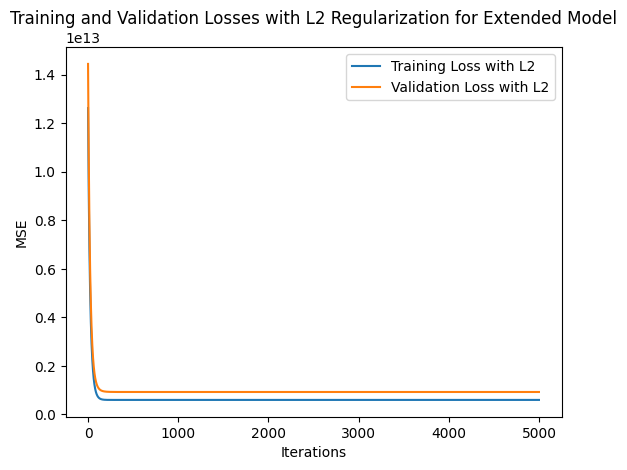

Final Training Loss: 5.91e+11
Final Validation Loss: 9.18e+11
Theta Parameters: [4706527.38532108  483299.10281306   89415.74288953  490099.98064602
  335005.08212085  151333.6042626   105795.43838378  186243.88191235
  140713.19277844  356470.93368442  213217.69013758  252183.68112672]


In [20]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import decimal

df = pd.read_csv('ML4105/Assignments/Assignment 2/Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = df[features]
y = df['price']

categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[categorical_vars] = X[categorical_vars].applymap(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def gradient_descent_l2(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000, lambda_reg=0.1):
    m = len(y_train)
    X_train = np.hstack((np.ones((m, 1)), X_train))
    theta = np.zeros(X_train.shape[1])
    cost_history_train = []
    cost_history_val = []

    for _ in range(iterations):
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradients = 2/m * X_train.T.dot(errors_train) + (2 * lambda_reg * theta)

        theta[0] -= learning_rate * 2/m * X_train[:,0].T.dot(errors_train)
        theta[1:] -= learning_rate * gradients[1:]

        cost_train = np.sum(errors_train ** 2) / (2 * m) + (lambda_reg * np.sum(np.square(theta[1:])))
        cost_history_train.append(cost_train)

        predictions_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val)).dot(theta)
        errors_val = predictions_val - y_val
        cost_val = np.sum(errors_val ** 2) / (2 * len(y_val))
        cost_history_val.append(cost_val)

    return theta, cost_history_train, cost_history_val

X_train_np = np.array(X_train_scaled)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

theta, cost_history_train, cost_history_val = gradient_descent_l2(
    X_train_np, y_train_np, X_test_scaled, y_test_np, learning_rate=0.01, iterations=5000, lambda_reg=0.1
)

plt.plot(cost_history_train, label='Training Loss with L2')
plt.plot(cost_history_val, label='Validation Loss with L2')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Training and Validation Losses with L2 Regularization for Extended Model')
plt.legend()
plt.show()

print(f"Final Training Loss: {cost_history_train[-1]:.2e}")
print(f"Final Validation Loss: {cost_history_val[-1]:.2e}")

print(f"Theta Parameters: {theta}")

**Moving from 2B with standardization to 3B with added L2 regularization results in increased training and validation losses, suggesting that in this context, L2 regularization did not enhance the model's performance.**